Бруцкий-Стемпковский Н.А.

2023-02-27

Тестовое задание по Основам DS

In [843]:
import numpy as np
import pandas as pd

import random
import string

1. Python и ООП

1.1. Конволюции

Решим с помощью NumPy. Метод shape даст размерность входной матрицы, что позволит сразу инициализировать пустую заданного размера. Далее в цикле рассчитываем соответствующие знчения.

In [844]:
matrix  =  np.array([[  [240, 204,  49,  23, 210, 172, 231, 212,   4, 228],
                        [139, 127, 222, 173, 109, 215, 104, 162, 171,  82],
                        [112, 103,  63,  61,  91, 248, 236, 109,  23, 119], 
                        [120, 187, 177, 228,  28, 188, 139,  33,  68, 162], 
                        [ 63,   0,   9,   0, 157, 252, 171,  17, 221,  68], 
                        [ 39, 148, 243,  35,  64, 248,  60,  53, 247, 211]], 
                        [[ 37, 130, 237, 121,  71,   9, 179, 160, 220, 223],
                        [ 34,  52, 209, 179, 102, 224, 163, 167,  54,  53], 
                        [ 57, 138, 192, 132,  74, 124, 170,  64,  17, 247], 
                        [201, 113, 106, 175,  15, 223, 212,  14, 133,  53],
                        [ 35, 250, 183,  28,  72, 223, 202, 162, 252,   2], 
                        [150, 248,  29,   5,   7,  48, 209, 239, 183, 119]], 
                        [[ 73,  12, 104,  15,  51,  27, 187, 182,  88,  85], 
                        [120, 206,   3, 126, 200, 201, 153,  28,   9, 100], 
                        [ 88, 142,  14, 179, 193, 244,  30, 251,   2,  86], 
                        [168, 174,  30, 102,  24,  45, 174, 165,  90,  67], 
                        [227,  94, 130, 131,  56, 108, 235, 213,   9,  41], 
                        [ 49,  89,  16, 190, 207, 136, 176,  58, 153,  57]]])

In [845]:
conv = np.empty([matrix.shape[0], matrix.shape[1] - 2, matrix.shape[2] - 2])

for i in range(matrix.shape[0]):
    for j in range(1, matrix.shape[1] - 1):
        for k in range(1, matrix.shape[2] - 1):
            sub_matrix = matrix[i, j-1:j+2, k-1:k+2]
            conv[i, j-1, k-1] = np.mean(sub_matrix)

In [846]:
# conv

Немного расширим функционал. Данный метод используют при обработке изображений, поэтому входная матрица именно трехслойная, хотя может быть и иной. А размер именно варьируется. Позволим обходить наше изображение окном большего размера:

In [847]:
n = 5

In [848]:
assert matrix.shape[1] > n \
       and matrix.shape[2] > n \
       and n > 0 \
       and n % 2 == 1 , \
       "Неверный размер (должно быть нечётным и положительным, но не больше меньшего размера изображения)"

conv = np.empty([matrix.shape[0], matrix.shape[1] - n + 1, matrix.shape[2] - n + 1])

for i in range(matrix.shape[0]):
    for j in range(n//2, matrix.shape[1] - n//2):
        for k in range(n//2, matrix.shape[2] - n//2):
            sub_matrix = matrix[i, j-n//2:j+n//2+1, k-n//2:k+n//2+1]
            conv[i, j-n//2, k-n//2] = np.mean(sub_matrix)

In [849]:
# conv

1.2. Необитаемый остров

Определим базовый класс Human.

Определим в нем базовые атрибуты и методы, которые будут присущи всем и кратко опишем их:
1. Имя. По умолчанию можно генерить что-нибудь. Можно задавать. Почти бесполезный атрибут...
2. Фамилия. По умолчанию можно генерить что-нибудь. Можно задавать. При замужестве женщина берет фамилию мужа. Чуть более полезный атрибут.
3. Возраст. Полезный атрибут. Будем задавать числом месяцев, прожитых от рождения, так как временной шаг на острове - один месяц.
4. О грустном... Определим сразу для каждого жителя дату его смерти... Продожительность жизни на острове распределена нормально с мат. ожиданием 960 месяцев и среднеквадратичным отклонением 100 месяцев. По достижении жителем указанного возраста он будет умирать. По достижении жителем возраста 216 месяцев - он становится взрослым.
5. Цвет глаз. Атрибут. Генерится случайно.
6. Цвет волос. Атрибут. Генерится случайно.
7. Пол. Атрибут. Бинарный. Генераится случайно.
8. Наличие родителей. Будет ссылка на родителей.
9. Наличие детей.
10. Наличие супрга/супруги.
11. Текущий статус. Жив или мёрт...

Базовые методы:
1. Идти..
2. Есть.. 
3. Спать..

Пока бесполезны, так как пока в динамику Острова мы не вводим ничего кроме социальных отношений.

Далее создадим путём наследования от данного класса мужчин и женщин. Сразу. Без промежуточной стадии. Промежуточные классы детей не обладают какими-то особыми способностями. Но при этом переход через совершеннолетие и создание нового объекта вызовет проблемы с изменением родственных связей.
Поэтому определим в данном классе общие для всех методы, которые будут иметь соответствующую проверку на возраст.

Возрастные методы:
1. Играть
2. Работать в поле

В дальнейшем планируется создать класс Острова, в котором будут агрегироваться все экземпляры человеческих классов, там же будут описаны ивенты происходящие на Острове. Различные события будут вызывать у экземпляра класса различные служебные методы:

Служебные методы:
1. Увеличение возраста. Добавить единицу к возрасту и проверить, не умер ли житель от старости.
2. Женитьба. Добавить в атрибут self.spouse ссылку на объект супруга/супруги.


In [850]:
class Human:
    """
    Базовый класс человека
    """

    def __init__(self, name, surname, age, 
                       death_age, c_eye, c_hair, 
                       sex=None, parents=None, childrens=None, 
                       spouse=None, status="alive"):
        """
        Атрибуты:
        name: str
        surname: str
        age: int
        death_age: int
        c_eye: str ["blue", "green", "brown"]
        c_hair: str ["blond", "brunett", "red"]
        sex: str ["male", "female"]
        parents: tuple(object)
        childrens: list(object)
        spouse: object
        status: str ["alive", "dead"]
        """
        self.name = name
        self.surname = surname
        self.age = age
        self.death_age = death_age
        self.c_eye = c_eye
        self.c_hair = c_hair
        self.sex = sex
        self.parents = parents
        self.childrens = childrens
        self.spouse = spouse
        self.status = status
    
    def go(self):
        """
        Базовый метод 1
        """
        print("Иду по дороге из жёлтого кирпича")

    def eat(self):
        """
        Базовый метод 2
        """
        print("Ммм, вкусно!")
    
    def slep(self):
        """
        Базовый метод 3
        """
        print("Разбудите в 6:30 утра")
    
    def play(self):
        """
        Возрастной метод 1
        """
        if self.age < 216:
            print("Играю на площадке")
        else:
            print("Я уже вырос...")
    
    def work(self):
        """
        Возрастной метод 2
        """
        if self.age < 216:
            print("Я ещё слишком мал")
        else:
            print("Работаю в поле")
        
    def age_add(self):
        """
        Служебный метод класса Человек. Добавляет +1 к возрасту и проверяет 
        достижение возраста смерти для данного экземпляра
        """
        self.age += 1
        if self.age == self.death_age:
            self.status = "dead"
    
    def married(self, another):
        """
        Служебный метод класса Человек. Указывает переданный объект как 
        супруга/супругу
        """
        self.spouse = another
    
    def give_baby(self, another):
        """
        Служебный метод класса Человек. Добавляет переданный объект как 
        ребенка
        """
        if self.childrens is None:
            self.childrens = [another]
        else:
            self.childrens.append(another)
    
    def set_parents(self, mother, father):
        """
        Служебный метод класса Человек. Устанавливает переданные объект как 
        родителей
        """
        self.parents = (mother, father)
    
    def get_name(self):
        return f"{self.name} {self.surname}"


Создадим Классы Взрослых путём наследования от Класса Человек.

In [851]:
class Man(Human):
    """
    Класс мужчины
    """
    def __init__(self, name, surname, age, 
                       death_age, c_eye, c_hair, 
                       sex="male", parents=None, childrens=None, 
                       spouse=None, status="alive"):
        """
        Дополнительных атрибутов нет
        """
        super().__init__(name, surname, age, 
                         death_age, c_eye, c_hair, 
                         sex, parents, childrens, 
                         spouse, status)
        
    def hunt(self):
        """
        Метод для взрослого мужчины 1
        """
        print("Добываю мамонта")

In [852]:
class Woman(Human):
    """
    Класс женщины
    """
    def __init__(self, name, surname, age, 
                       death_age, c_eye, c_hair, 
                       sex="female", parents=None, childrens=None, 
                       spouse=None, status="alive", pregnancy_status=False, pregnancy_term=0):
        """
        Доп атрибуты:
        pregnancy_status: bool
        pregnancy_term
        """
        super().__init__(name, surname, age, 
                         death_age, c_eye, c_hair, 
                         sex, parents, childrens, 
                         spouse, status)
        self.pregnancy_status = pregnancy_status
        self.pregnancy_term = pregnancy_term
    
    def age_add(self):
        """
        Служебный метод класса Женщина. Добавляет +1 к возрасту и проверяет 
        достижение возраста смерти для данного экземпляра
        В случае беременности увеличивает срок беременности на 1.
        """
        self.age += 1
        if self.age == self.death_age:
            self.status = "dead"
        
        if self.pregnancy_status:
            self.pregnancy_term += 1
    
    def married(self, another):
        """
        Служебный метод класса Женщина. Указывает переданный объект как 
        супруга/супругу
        Меняет фамилию
        """
        self.spouse = another
        self.surname = another.surname

Создадим Класс Остров. Он будет:
1. Агрегировать у себя всех жителей поддерживая актуальный список живых и умерших жителей
2. По прошествии месяца всем живым жителям добавлять месяц жизни к возрасту, беременным женщиным - месяц к сроку беременности.
3. По достижении срока беременности - создавать нового жителя.
4. Создвать вероятные пары из незамужних/неженатых совершеннолетних жителей
5. Для всех пар до 50 лет младшего супруга - ивент на возникновение беременности (аха...)
6. Генерировать жителей при создании экземпляра класса

In [853]:
class Island:
    """Класс Остров"""
    def __init__(self, n=10, 
                 be_a_man_probability = 0.5,
                 conception_probabity = 0.15,
                 sympathy_probability = 0.25,
                 added_common_probability = 0.05,
                 twins_probabilty = 0.1):
        """
        n: int (число попавших на остров жителей)
        be_a_man_probability: float (0: 1) (вероятность попасть на остров/родиться мужчиной)
        conception_probabity: float (0: 1) (вероятность зачатия ребенка у пары)
        sympathy_probability: float (0: 1) (базовая вероятность симпатии)
        added_common_probability: float (0: 1) (добавочная вероятность симпатии при совпадении цвета глаз или волос)
        twins_probabilty: float (0: 1) (вероятность рождения двойни)
        """
        self.alive_citizens = []
        self.dead_citizens = []
        self.be_a_man_probability = be_a_man_probability
        self.conception_probabity = conception_probabity
        self.sympathy_probability = sympathy_probability
        self.added_common_probability = added_common_probability
        self.twins_probabilty = twins_probabilty
        
        self.__generation(n)
    
    def __generate_random_string(self, length):
        """
        Служебный метод класса Остров
        Генерит рандомную строку заданной длины
        """
        letters = string.ascii_lowercase
        return ''.join(random.choice(letters) for i in range(length))

    def __generation(self, n, surname=None, age=None, c_eye=None, c_hair=None, parents=None):
        """
        Служебный метод класса остров
        Генерирует случайным образом жителей Острова

        Если не переданы дополнительные настройки, то параметры будут следующими:

        Вероятности:
        Случаное имя из 6 букв
        Случайную фамилию из 10 букв
        Случайный возраст от 20 до 70 лет в месяцах (равномерное распределение)
        Случайный возраст смерти (однозначно больше текущего, нормальное распределение)
        Случайный цвет глаз и волос
        Случайный пол

        Иначе функция используется для генерации ребенка:
        Случаное имя из 6 букв
        Берет фамилию родителей
        Возраст = 0 (младенец)
        Случайный возраст смерти (однозначно больше текущего, нормальное распределение)
        Случайный цвет глаз и волос (совпадёт с одним из родителей)
        Должен быть передан список родителей

        После первой генерации вызовем служебный метод __dates для имитации того, что на Остров уже 
        попали супружеские пары
        Семейных связей кроме как муж - жена при первой генерации больше не будет, ибо можно нагородить лес...
        """
        for _ in range(n):
            name = self.__generate_random_string(6)

            if surname is None:
                cur_surname = self.__generate_random_string(10)
            else:
                cur_surname = surname

            if age is None:
                cur_age = (np.random.randint(20, 71)) * 12
            else:
                cur_age = 0

            cur_death_age = 0
            while cur_death_age < cur_age:
                cur_death_age = int(np.random.normal(loc=80, scale=8.3) * 12)

            if c_eye is None:
                cur_c_eye = random.choice(["blue", "green", "brown"])
            else:
                cur_c_eye = random.choice(c_eye)

            if c_hair is None:
                cur_c_hair = random.choice(["blond", "brunett", "red"])
            else:
                cur_c_hair = random.choice(c_hair)

            args = [name, cur_surname, cur_age, cur_death_age, cur_c_eye, cur_c_hair]

            if np.random.binomial(1, self.be_a_man_probability):
                self.alive_citizens.append(Man(*args))
            else:
                self.alive_citizens.append(Woman(*args))
            
            if parents:
                mother = parents[0]
                father = parents[1]
                baby = self.alive_citizens[-1]

                mother.give_baby(baby)
                father.give_baby(baby)
                baby.set_parents(mother, father)
            
            if age is None:
                self.__dates()
    
    def __conception(self):
        """
        Метод, имитирующий зачатие у замужних женщин возрастом до 50 лет
        """
        for citizen in self.alive_citizens:
            if citizen.sex == "female" and not citizen.spouse is None and not citizen.pregnancy_status and citizen.age < 600:
                if np.random.binomial(1, self.conception_probabity):
                    citizen.pregnancy_status = True


    def __dates(self):
        """
        Метод, имитирующий образование новой пары из двух незамужних граждан
        Формируется список незамужних и неженатых девушек и парней.
        Формируются случайные пары. Число пар будет равно меньшей из длин списков.
        Для каждой пары проверяется несовпадение прямых родителей
        считается суммарная вероятность взаимной симпатии
        В случае успеха у обоих объектов вызывается метод married
        """
        non_married_women = []
        non_married_men = []

        for citizen in self.alive_citizens:
            if citizen.age > 216 and citizen.spouse is None:
                if citizen.sex == "female":
                    non_married_women.append(citizen)
                else:
                    non_married_men.append(citizen)

        while non_married_men and non_married_women:

            guy = random.choice(non_married_men)
            non_married_men.remove(guy)
            
            girl = random.choice(non_married_women)
            non_married_women.remove(girl)

            if guy.parents and guy.parents == girl.parents:
                continue

            total_probability = self.sympathy_probability

            if girl.c_eye == guy.c_eye:
                total_probability += self.added_common_probability
            
            if girl.c_hair == guy.c_hair:
                total_probability += self.added_common_probability
        
            if np.random.binomial(1, total_probability):
                guy.married(girl)
                girl.married(guy)

    def __childbirth(self):
        """
        Метод, имитирующий рождение ребенка у беременной женщины
        Вызывается служебный метод __generation, в который передается:
        Число детей (возможна двойня)
        фамилия ребенка
        age = True - будет создан младенец
        c_eye - цвет глаз у родителей
        c_hair - цвет волос у родителей
        список родителей - мама и папа.
        """
        for citizen in self.alive_citizens:
            if citizen.sex == "female" and citizen.pregnancy_status and citizen.pregnancy_term == 9:

                citizen.pregnancy_status = False
                citizen.pregnancy_term = 0
                
                mother = citizen
                father = citizen.spouse

                n = np.random.binomial(1, self.twins_probabilty) + 1

                surname = mother.surname

                age = True

                c_eye = (mother.c_eye, father.c_eye)

                c_hair = (mother.c_hair, father.c_hair)

                parents = (mother, father)

                self.__generation(n, surname, age, c_eye, c_hair, parents)
    
    def make_time_step(self, n=1):
        """
        Метод, имитирующий прошествие одного (по умолчанию) месяца на Острове.
        За это время:
        Добавка всем жителям +1 к возрасту.
        Убирает умерших жителей из списка граждан Острова.
        Увеличивает срок беременности беременных женщин на 1. 
        По достижении срока беременности 9 месяцев - появляется ребенок (возможно не один)
        Для всех жителей без второй половинки устраивает свидания (аха...)
        У некотрых замужних не беременных женщин до 50 лет возрастом возникает беременность (аха..)
        """
        for _ in range(n):
            index = 0

            while self.alive_citizens and index < len(self.alive_citizens):

                citizen = self.alive_citizens[index]

                citizen.age_add()
                
                if citizen.age == citizen.death_age:
                    citizen.status = "dead"
                    self.dead_citizens.append(citizen)
                    self.alive_citizens.pop(index)
                else:
                    index += 1
        
            self.__conception()

            self.__dates()

            self.__childbirth()
    
    def get_lists(self):
        """
        Метод, возвращаюащий перечень всех жителей Острова с их характеристиками
        в виде Pandas DataFreim
        """
        name = []
        sex = []
        age = []
        c_eye = []
        c_hair = []
        parents = []
        childrens = []
        spouse = []
        status = []
        pregnancy = []

        for citizen in self.alive_citizens + self.dead_citizens:

            name.append(citizen.get_name())
            sex.append(citizen.sex)
            age.append(citizen.age//12)
            c_eye.append(citizen.c_eye)
            c_hair.append(citizen.c_hair)
            
            if citizen.parents:
                parents.append(f"{citizen.parents[0].get_name()}, {citizen.parents[1].get_name()}")
            else:
                parents.append(None)
            
            if citizen.childrens:
                childrens.append(", ".join([obj.get_name() for obj in citizen.childrens]))
            else:
                childrens.append(None)
            
            if citizen.spouse:
                spouse.append(citizen.spouse.get_name())
            else:
                spouse.append(None)
            
            status.append(citizen.status)

            if citizen.sex == "female" and citizen.pregnancy_status:
                pregnancy.append(citizen.pregnancy_term)
            else:
                pregnancy.append(None)
            
        
        d = {"Имя": name, "Пол": sex, "Возраст (полных лет)": age,
             "Цвет_глаз": c_eye, "Цвет_волос": c_hair,
             "Родители": parents, "Дети": childrens, "Супруг(а)": spouse, 
             "Статус": status, "Беременность": pregnancy}
        return pd.DataFrame(data=d)


Для работы необходимо создать объект Остров и при необходимости передать ему параметры (в скобках - значение по умолчанию):
1. Размер числа жителей (10)
2. Вероятность появления на Острове или рождения мальчика (0.5)
3. Вероятность зачатия (0.15)
4. Базовая вероятность взаимной симпатии (0.25)
5. Добавочная вероятность взаимной симпатии при совпадении цвета волос или глаз, добавляется за каждый признак (0.05)
6. Вероятность появления двойняшек/близнецов при рождении (0.1)

Для управления Островом существует метод make_time_step, в который можно передать число месяцев, на которое можно "промотать" (по умолчанию равно 1).

Для отображения результатов есть метод get_list (ничего не принимает на вход).

При работе были использованы библиотеки Pandas, NumPy, встроенные модули random, string

In [854]:
# paradise = Island()
# paradise.make_time_step(5)
# paradise.get_lists()

1.3. Работа с исключениями и логами

Определим функции, которые возбуждают исключения

In [855]:
def func1():
    if np.random.binomial(1, 0.5):
        raise ValueError
    else:
        raise KeyError

def func2():
    if np.random.binomial(1, 0.5):
        raise TypeError

def func3():
    if np.random.binomial(1, 0.5):
        raise ZeroDivisionError


In [856]:
def my_func():

    for f in (func1, func2, func3):

        log_file = open("log.txt", "a")

        try:
            f()
        except ValueError:
            log_file.write("При вызове функции возникло исключение ValueError. Сделали то и то. Продолжаем." + "\n")
            pass
        except KeyError:
            log_file.write("При вызове функции возникло исключение KeyError. Сделали это и это. Продолжаем." + "\n")
            pass
        except ZeroDivisionError:
            log_file.write("При вызове функции возникло исключение ZeroDivisionError. Сделали то и другое. Продолжаем." + "\n")
            pass
        except TypeError:
            log_file.write("При вызове функции возникло исключение TypeError. Приплыли..." + "\n")
            raise TypeError
        finally:
            log_file.close()
    
    print("Hello, world!")

In [857]:
# my_func()

2. Математика и логика

2.1. Статистика случайной величины

Найдём выборочное среднее и выбочоное среднеквадратичное отклонение. Воспользуемся пакетом NumPy.

In [858]:
def stat(x):
    x = np.array(x)

    x_mean = np.sum(x) / x.size

    x_std = np.sqrt(np.sum((x - x_mean)**2) / x.size)

    return x_mean, x_std

In [859]:
x = np.random.normal(loc=80, scale=8.3, size=50)

In [860]:
stat(x)

(79.08168513740458, 8.481448199678896)

Проверим результат, испольльзовав встроенные методы NumPy.

In [861]:
(x.mean(), x.std(ddof=0)) == stat(x)

True

2.2. Площадь между кривыми двух функций

Определим сами функции, между которыми будем считать площадь. На вход они будут принимать последовательность. Можно не заморачиваться с входнными данными, так как жти функции будут вызываться другой функцией

In [862]:
def func1(x):
    """
    Функция № 1
    """
    return x**2

In [863]:
def func2(x):
    """
    Функция № 2
    """
    return x*2 - 3

Определим функцию, которая будет считать интеграл. На вход ей нужно подать функции, кортеж с интервалом и шаг интегрирования

In [864]:
def integral_func(func1, func2, a, b, step):
    """
    Функция считает площадь между графиками двух функций 
    на заданном интервал и с заданным шагом интегрирования
    """    
    x = np.arange(a, b, step)

    return np.sum(np.abs(func1(x) - func2(x)) * step)

In [865]:
# integral_func(func1, func2, 0, 10, 0.001)

2.3. Веротность и математическое ожидание

При решении задачи воспользуемся двумя фактами:
1. Наиболее вероятное число, которое выпадет, равно мат. ожиданию (хотя там может быть и дробное число, но мы просто опустим неудобный факт..)
2. Матожидания можно складывать (то есть сумма очков при двух бросках будет стремиться к удвоенному мат. ожиданию)

In [866]:
def get_dise_1_mean():
    """
    Матожидание значения для первого кубика
    """
    return sum(range(1, 17))/16

In [867]:
def get_dise_2_mean():
    """
    Матожидание значения для второго кубика
    """
    return sum(map(lambda x: x * (80 - x) / 280, range(10, 71, 10)))

In [868]:
get_dise_1_mean(), get_dise_2_mean()

(8.5, 30.0)

Напишем функцию

In [869]:
def get_best_choice(x):
    """
    Функция возвращает лучшую стратегию броска в зависимости от результата оппонета
    Выполняется проверка входных данных
    """
    assert 11 <= x <= 96, "Такого значения не может быть получено"
    
    d = {get_dise_1_mean(): "Лучше бросить 1 кубик 1 раз",
         get_dise_1_mean() * 2: "Лучше бросить 1 кубик 2 раза",
         get_dise_1_mean() * 3: "Лучше бросить 1 кубик 3 раза",
         get_dise_2_mean(): "Лучше бросить 2 кубик 1 раз",
         get_dise_2_mean() * 2: "Лучше бросить 2 кубик 2 раза",
         get_dise_2_mean() * 3: "Лучше бросить 2 кубик 3 раза",
         get_dise_1_mean() + get_dise_2_mean(): "Лучше бросить оба кубика по одному разу"}

    cur_diff = float("inf")
    cur_choice = None

    for key in d.keys():
        if abs(x - key) < cur_diff:
            cur_diff = abs(x - key)
            cur_choice = key
    
    return d[cur_choice]

In [870]:
get_best_choice(11), get_best_choice(22), get_best_choice(33), get_best_choice(44), get_best_choice(96)

('Лучше бросить 1 кубик 1 раз',
 'Лучше бросить 1 кубик 3 раза',
 'Лучше бросить 2 кубик 1 раз',
 'Лучше бросить оба кубика по одному разу',
 'Лучше бросить 2 кубик 3 раза')

Покажем, что выброшенное значение действиетльно сходится к рассчитанному мат. ожиданию (Закон больших чисел)

In [871]:
dise_1 = pd.Series(range(1, 17))
dise_2 = pd.Series([10] * 70 + [20] * 60 + [30] * 50 + [40] * 40 + [50] * 30 + [60] * 20 + [70] * 10)

In [872]:
number_of_throws = 1000

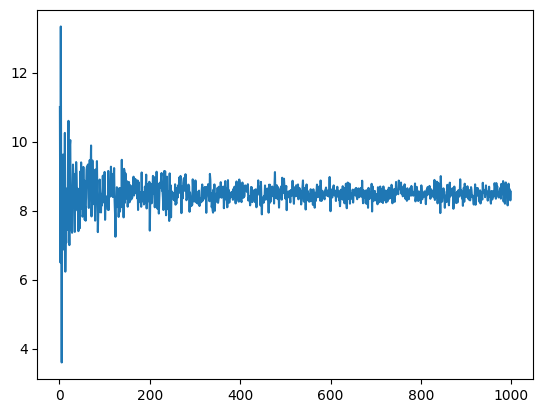

In [873]:
pd.Series([dise_1.sample(n, replace=True).mean() for n in range(number_of_throws)]).plot();

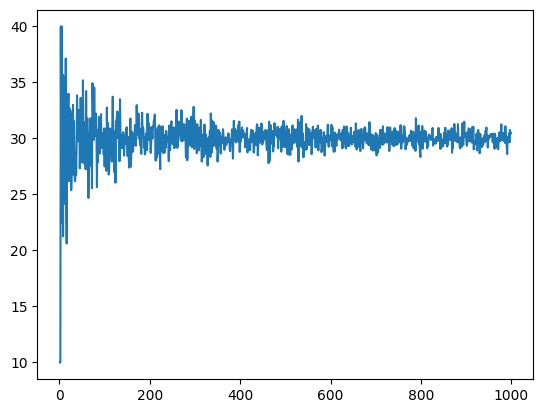

In [874]:
pd.Series([dise_2.sample(n, replace=True).mean() for n in range(number_of_throws)]).plot();